In [1]:
import numpy as np
from scipy.interpolate import make_smoothing_spline

import matplotlib.pyplot as plt

In [2]:
filename = "yaw_normalised_diag.txt"

data = np.loadtxt(filename, delimiter=',', skiprows=1)
print(data.shape)
print(data)

labels_str = np.loadtxt(filename, delimiter=',', max_rows=1, dtype=str)[1:]
labels = np.append(np.linspace(0, -0.5, len(labels_str)//2 + 1), np.linspace(0.1, 0.5, len(labels_str)//2))

rmt = ['-'] * 5 + ['--'] * 5
print(labels_str)
print(labels)

(206, 12)
[[-5.91304348e+01  3.68385506e-07  3.68385506e-07 ...  3.68385506e-07
   3.68385506e-07  3.68385506e-07]
 [-5.85507246e+01  3.68385506e-07  3.68385506e-07 ...  3.68385506e-07
   3.68385506e-07  3.68385506e-07]
 [-5.79710145e+01  3.68385506e-07  3.68385506e-07 ...  3.68385506e-07
   3.68385506e-07  3.68385506e-07]
 ...
 [ 5.85507246e+01  3.68385506e-07  3.68385506e-07 ...  3.68385506e-07
   3.68385506e-07  3.68385506e-07]
 [ 5.91304348e+01  3.68385506e-07  3.68385506e-07 ...  3.68385506e-07
   3.68385506e-07  3.68385506e-07]
 [ 5.97101449e+01  3.68385506e-07  3.68385506e-07 ...  3.68385506e-07
   3.68385506e-07  3.68385506e-07]]
['Yaw_0.0' 'Yaw_-0.5' 'Yaw_-1.0' 'Yaw_-1.5' 'Yaw_-2.0' 'Yaw_-2.5'
 'Yaw_0.5' 'Yaw_1.0' 'Yaw_1.5' 'Yaw_2.0' 'Yaw_2.5']
[ 0.  -0.1 -0.2 -0.3 -0.4 -0.5  0.1  0.2  0.3  0.4  0.5]


# Tests

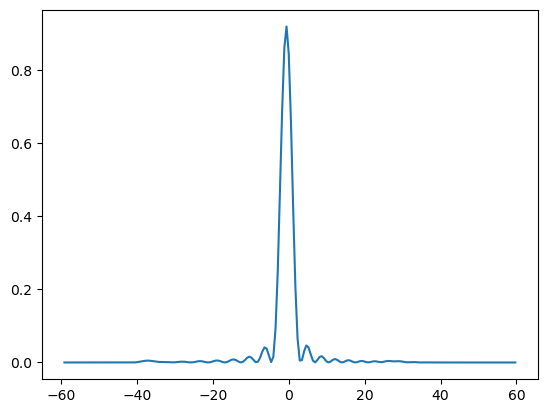

In [3]:
plt.plot(data[:, 0], data[:, 1])

In [4]:
mask = (data[:, 0] < 20) & (data[:, 0] > -20)

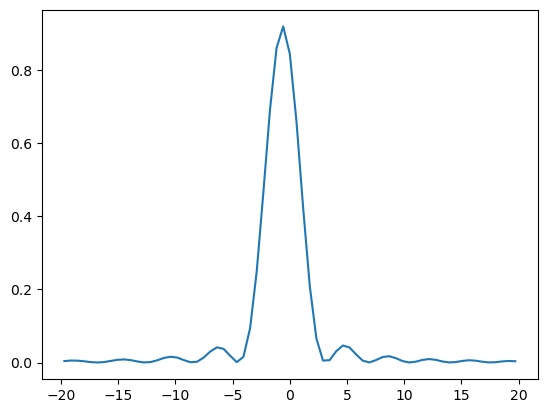

In [5]:
plt.plot(data[mask, 0], data[mask, 1])

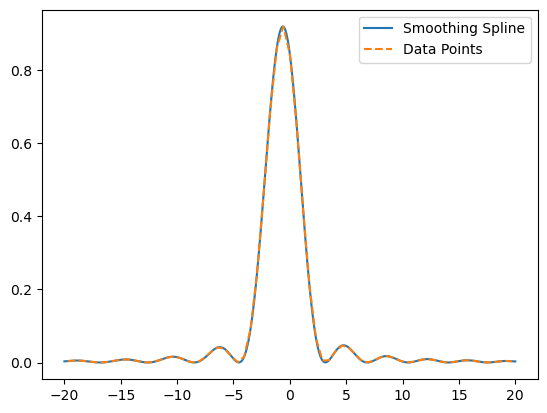

In [6]:
splines = make_smoothing_spline(data[mask, 0], data[mask, 1])
x_smooth = np.linspace(-20, 20, 1000)
y_smooth = splines(x_smooth)

plt.plot(x_smooth, y_smooth, "-", label='Smoothing Spline')
plt.plot(data[mask, 0], data[mask, 1], '--', label='Data Points')
plt.legend()

# Plot

In [7]:
x_data = data[:, 0]
y_data = data[:, 1:]

# mask
theta_limit = 18
mask = (x_data < theta_limit) & (x_data > -theta_limit)

# smoothing spline
N_smoothing = 10000

x_smooth = np.linspace(-theta_limit, theta_limit, N_smoothing)
y_smooth = np.empty((y_data.shape[1], N_smoothing))

for i in range(y_data.shape[1]):
    splines_smoothing = make_smoothing_spline(x_data[mask], y_data[mask, i])
    y_smooth[i] = splines_smoothing(x_smooth)

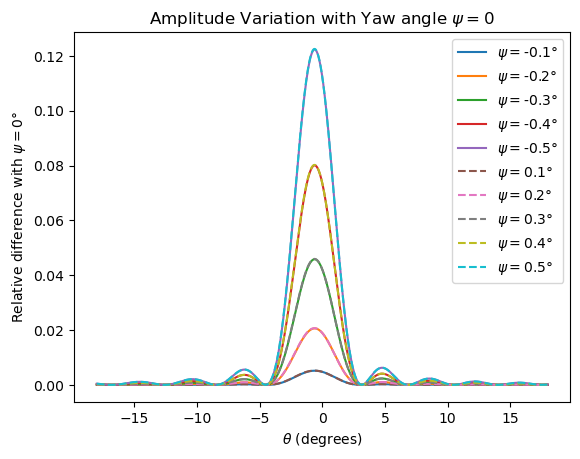

In [8]:
for i in range(1, y_data.shape[1]):
    plt.plot(x_smooth, y_smooth[0] - y_smooth[i], rmt[i-1], label=rf"$\psi=${labels[i].round(1)}°")
    
plt.xlabel(r"$\theta$ (degrees)")
plt.ylabel("Relative difference with $\psi = 0$°")
plt.title(r"Amplitude Variation with Yaw angle $\psi = 0$")
plt.legend()

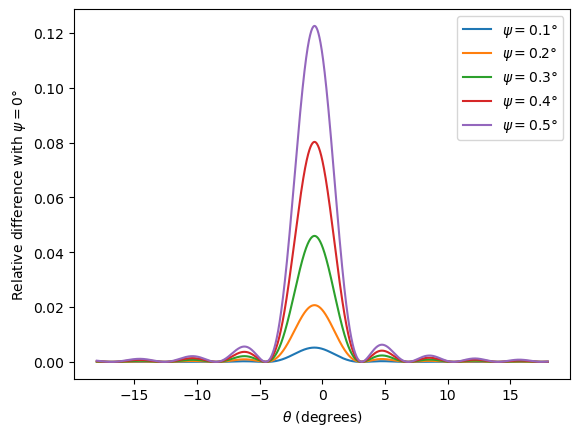

In [9]:
for i in range(y_data.shape[1] // 2 + 1, y_data.shape[1]):
    plt.plot(x_smooth, y_smooth[0] - y_smooth[i], label=rf"$\psi=${labels[i].round(1)}°")
    
plt.xlabel(r"$\theta$ (degrees)")
plt.ylabel("Relative difference with $\psi = 0$°")
# plt.title(r"Amplitude Variation with Pitch angle $\phi = 0$°")
plt.legend()
#plt.savefig("amplitude_variation.svg", format='svg', bbox_inches='tight')